In [48]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lectura de los datos

In [36]:
path_df = "../04_Feature_Engineering/"

#Lectura del df del modelo
with open(path_df+'dfmodelo.pickle', 'rb') as data:
    df = pickle.load(data)

#Lectura del x_train
with open(path_df+'X_train.pickle', 'rb') as data:
    X_train = pickle.load(data)

#Lectura del x_test
with open(path_df+'X_test.pickle', 'rb') as data:
    X_test = pickle.load(data)

#Lectura del y_train
with open(path_df+'y_train.pickle', 'rb') as data:
    y_train = pickle.load(data)

#Lectura del y_test
with open(path_df+'y_test.pickle', 'rb') as data:
    y_test = pickle.load(data)

# Cross-Validation for Hyperparameter tuning

First, we can see what hyperparameters the model has:

In [49]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


We'll tune the following ones:

C: Penalty parameter C of the error term.
kernel: Specifies the kernel type to be used in the algorithm.
gamma: Kernel coefficient.
degree: Degree of the polynomial kernel function.

# Randomized Search Cross Validation

We first need to define the grid:

In [50]:

# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [52]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Esperanza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: setting an array element with a sequence.

- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample

- Single parameter called k that refers to the number of groups that a given data sample is to be split into.

- It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

- Procedure: 
        * Shuffle the dataset randomly.
        * Split the dataset into k groups
        * For each unique group:
            Take the group as a hold out or test data set
            Take the remaining groups as a training data set
            Fit a model on the training set and evaluate it on the test set
            Retain the evaluation score and discard the model
        * Summarize the skill of the model using the sample of model evaluation scores


To summarize, there is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 or k = 10, as these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

— Page 184, An Introduction to Statistical Learning, 2013.

Explicación del funcionamiento con k=5

- Modelo1: Entrenamiento con Fold2 + Fold3 + Fold4 + Fold5, Validado con Fold1
- Modelo2: Entrenamiento con Fold1 + Fold3 + Fold4 + Fold5, Validado con Fold2
- .....

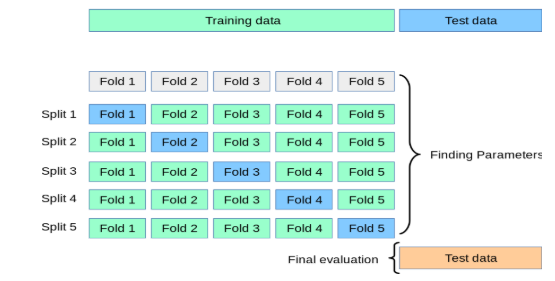

fuente: https://scikit-learn.org/stable/modules/cross_validation.html

Cross validation está implementado en la librería de sklearn. Podemos crear una instancia qeu divida el dataset 5n 5 partes, los mezcle antes de dividirlos y utiliza 
from sklearn.model_selection
import KFold

(it was the most popular machine learning algorithm amongst Kagglers until XGBoost took over). These reasons are:

Ensemble learning prevents overfitting of data
Bootstrapping enables random forest to work well on relatively small datasets
Predictors can be trained in parallel
Decision tree learning enables automatic feature selection

Bagging
Bagging is a method of generating new datasets from existing data by creating samples of the existing data with replacement. This means there could be repeated values in each of the newly created datasets.

Bagging is the magic that makes random forest popular because it avoids overfitting, despite increasing the number of trees. This is because it averages many low-bias and high-variance predictors, thereby reducing the variance without increasing bias. Consequently, random forests can achieve high accuracy without the risk of overfitting or underfitting data. Also, since multiple versions of the dataset are generated, it is possible to work with relatively small datasets.

fuente: 
https://www.datascience.com/blog/classification-random-forests-in-python

Random forest is an ensemble decision tree algorithm because the final prediction, in the case of a regression problem, is an average of the predictions of each individual decision tree; in classification, it's the average of the most frequent prediction. So, the algorithm takes the average of many decision trees to arrive at a final prediction, as shown in the image above.

In [10]:
df.head()

,filtered_words,filtered_words_lemm,num_insultos,score_emoji_tox,emphasize,toxico
478,"[toda, gente, alcasser, daba, ostias, hablando...","[todo, gente, alcasser, dar, ostia, hablar, ma...",0,0.0,1.0,0
81,"[carabinero, potente, sabe, ahogadillas”, play...","[carabinero, potente, saber, ahogadillas, ”, p...",0,0.0,1.0,0
77,"[quedao, dia, playa]","[quedao, dia, playa]",0,0.0,0.2,0
208,[perroflauta],[perroflauta],0,0.0,1.0,0
319,"[jajajajajajaja, ve, aqui, abrazo, cabestro]","[jajajajajajaja, ver, aqui, abrazar, cabestrar]",1,0.0,1.0,0


**One-Hot Encoding**

Proceso que toma variables categóricas, como los días de la semana y lo convierte en una representación numérica sin un ordenamiento arbitrario. Esto se hace para que el domingo que tendría el día 7 pese más que el lunes que tendría el 1

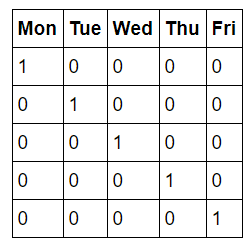

fuente: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0